# Parsing Model Parallelism Experiment Training Logs from DeepSpeed

### Necessary Imports

In [1]:
import logging
from src.log_parser import parse_log_file
from src.plotting import plot_smoothed_loss
from src.stats_calculator import calculate_stats
from src.constants import (
    common_columns, common_data_types, common_regex_pattern,
    pp_columns, pp_data_types, pp_regex_pattern
)

### GPT-2 Full Pretraining with Deepspeed using Data Parallelism
Used 2 nodes with 1 P100 Each
Here are the are the parsed training logs.

In [2]:
# Process log files
df = parse_log_file(
    file_path='data/1k_DP/training_run.log',
    regex_pattern=common_regex_pattern,
    columns=common_columns,
    data_types=common_data_types
)
df

,iteration,consumed samples,consumed tokens,elapsed time per iteration (ms),learning rate,global batch size,lm loss,loss scale,actual seqlen,number of skipped iterations,number of nan iterations,samples per second,tokens per gpu per second (tgs),TFLOPs,total elapsed time
0,1,1024,262144,83781.7,0.000060,1024,10.826870,1.0,256,0,0,12.222,1564.447,1.35,83.7817
1,2,2048,524288,100798.4,0.000060,1024,10.649660,1.0,256,0,0,10.159,1300.339,1.12,184.5801
2,3,3072,786432,82609.8,0.000060,1024,10.582610,1.0,256,0,0,12.396,1586.639,1.37,267.1899
3,4,4096,1048576,82703.2,0.000060,1024,10.538280,1.0,256,0,0,12.382,1584.847,1.36,349.8931
4,5,5120,1310720,82572.5,0.000060,1024,10.517830,1.0,256,0,0,12.401,1587.357,1.37,432.4656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1019904,261095424,81859.7,0.000006,1024,6.292383,1.0,256,0,0,12.509,1601.179,1.38,81691.1374
996,997,1020928,261357568,81983.4,0.000006,1024,6.278861,1.0,256,0,0,12.490,1598.762,1.38,81773.1208
997,998,1021952,261619712,81589.2,0.000006,1024,6.271109,1.0,256,0,0,12.551,1606.487,1.38,81854.7100
998,999,1022976,261881856,81570.1,0.000006,1024,6.290041,1.0,256,0,0,12.554,1606.863,1.38,81936.2801


Key statistics about the training speed are logged below

In [3]:
# Calculate statistics
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
stats = calculate_stats(df)
logging.info(f"Training Stats: {stats}")

INFO: Training Stats: {'Average Elapsed Time per iteration (s)': 82.0182, 'Average Samples Per Second': 12.486, 'Average Tokens per GPU per Second (TGS)': 1598.2087, 'Average TFLOPs': 1.3752}


Loss Curve

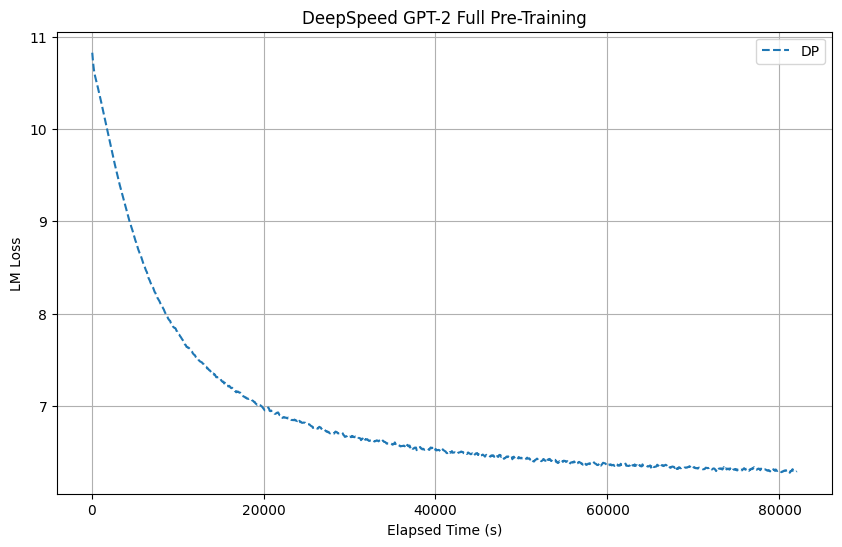

In [4]:
plot_smoothed_loss(
    dfs=[(df, "DP")],
    title="DeepSpeed GPT-2 Full Pre-Training",
    smoothing_factor=0.6,
    display=True
)

### Ablation Study of different Types of Model Parallelism

Parsing data log and log training speed metrics

In [5]:
df_DP = parse_log_file(
    file_path='data/100_DP/training_run.log',
    regex_pattern=common_regex_pattern,
    columns=common_columns,
    data_types=common_data_types
)

df_TP = parse_log_file(
    file_path='data/100_DP_TP/training_run.log',
    regex_pattern=common_regex_pattern,
    columns=common_columns,
    data_types=common_data_types
)

df_PP = parse_log_file(
    file_path='data/100_DP_PP/training_run.log',
    regex_pattern=pp_regex_pattern,
    columns=pp_columns,
    data_types=pp_data_types
)

# Calculate statistics
stats_DP = calculate_stats(df_DP)
stats_TP = calculate_stats(df_TP)
stats_PP = calculate_stats(df_PP)

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
logging.info(f"DP Stats: {stats_DP}")
logging.info(f"TP Stats: {stats_TP}")
logging.info(f"PP Stats: {stats_PP}")

INFO: DP Stats: {'Average Elapsed Time per iteration (s)': 82.4152, 'Average Samples Per Second': 12.4307, 'Average Tokens per GPU per Second (TGS)': 1591.1338, 'Average TFLOPs': 1.3687}
INFO: TP Stats: {'Average Elapsed Time per iteration (s)': 128.2263, 'Average Samples Per Second': 7.995, 'Average Tokens per GPU per Second (TGS)': 1023.359, 'Average TFLOPs': 0.8803}
INFO: PP Stats: {'Average Elapsed Time per iteration (s)': 40.5751, 'Average Samples Per Second': 25.2869, 'Average Tokens per GPU per Second (TGS)': 3236.7126, 'Average TFLOPs': 2.7864}


Training Losses Using DP=2, TP=2, and PP = 2

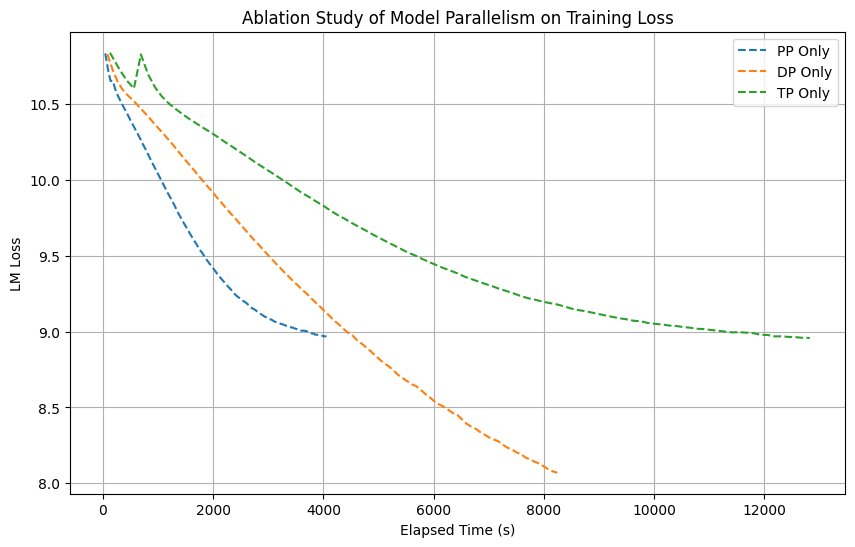

In [6]:
# Plot smoothed loss
dfs_to_plot = [
    (df_PP, "PP Only"),
    (df_DP, "DP Only"),
    (df_TP, "TP Only")
]

plot_smoothed_loss(
    dfs=dfs_to_plot,
    title="Ablation Study of Model Parallelism on Training Loss",
    smoothing_factor=0.6,
    display=True
)